In [273]:
import matplotlib.pyplot as plt
import cv2
import numpy

In [274]:
import os

path = "photos/test_images/"

files_list = [f for f in os.listdir(path) if os.path.isfile(f"{path}/{f}")]
print(files_list)

['Alphabet_E_20.jpg', 'Alphabet_F_28.jpg', 'Alphabet_H_20.jpg', 'Alphabet_U_28.jpg']


In [275]:
image = cv2.imread(f"{path}/{files_list[1]}")

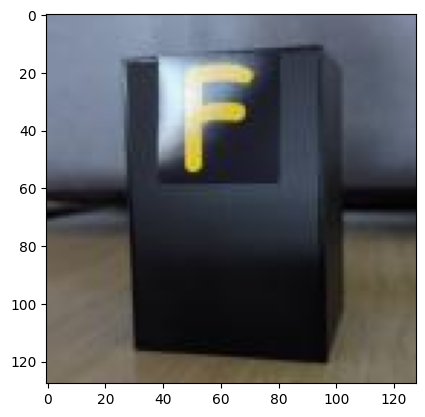

In [276]:
#convert from BGR to RGB
rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(rgb_image)

#### Scale abs

In [277]:
alpha = 1.7 # Contrast control (1.0-3.0)
beta = 0 # Brightness control (0-100)

scale_abs = cv2.convertScaleAbs(image, alpha=alpha, beta=beta)

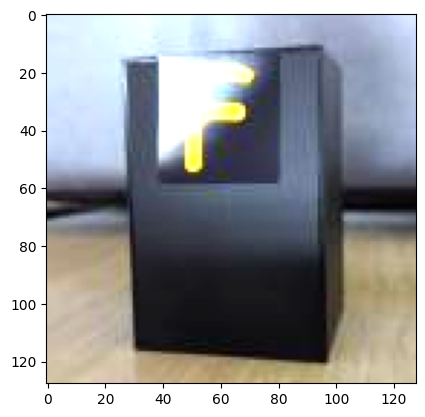

In [278]:
#convert from BGR to RGB
rgb_image = cv2.cvtColor(scale_abs, cv2.COLOR_BGR2RGB)
plt.imshow(rgb_image)

##### Use brightness ratio

In [279]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cols, rows = gray.shape
brightness = numpy.sum(image) / (255 * cols * rows)
minimum_brightness = 0.66
ratio = brightness / minimum_brightness

if ratio >= 1:
    print("Image already bright enough")
else:
    scale_abs = cv2.convertScaleAbs(image, alpha = 1 / ratio, beta = 0)

Image already bright enough


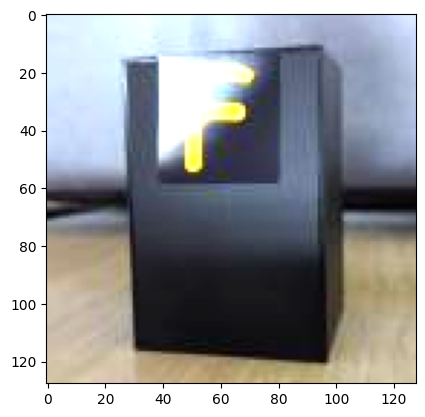

In [280]:
#convert from BGR to RGB
rgb_image = cv2.cvtColor(scale_abs, cv2.COLOR_BGR2RGB)
plt.imshow(rgb_image)

##### Automatic scaling

In [281]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Calculate grayscale histogram
hist = cv2.calcHist([gray],[0],None,[256],[0,256])
hist_size = len(hist)

# Calculate cumulative distribution from the histogram
accumulator = []
accumulator.append(float(hist[0]))
for index in range(1, hist_size):
    accumulator.append(accumulator[index -1] + float(hist[index]))

# Locate points to clip
clip_hist_percent = 1
maximum = accumulator[-1]
clip_hist_percent *= (maximum/100.0)
clip_hist_percent /= 2.0

# Locate left cut
minimum_gray = 0
while accumulator[minimum_gray] < clip_hist_percent:
    minimum_gray += 1

# Locate right cut
maximum_gray = hist_size -1
while accumulator[maximum_gray] >= (maximum - clip_hist_percent):
    maximum_gray -= 1

# Calculate alpha and beta values
alpha = 255 / (maximum_gray - minimum_gray)
beta = -minimum_gray * alpha

C:\Users\waiho\AppData\Local\Temp\ipykernel_12064\2924541763.py:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  accumulator.append(float(hist[0]))
C:\Users\waiho\AppData\Local\Temp\ipykernel_12064\2924541763.py:11: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  accumulator.append(accumulator[index -1] + float(hist[index]))


In [282]:
scale_abs = cv2.convertScaleAbs(image, alpha=alpha, beta=beta)

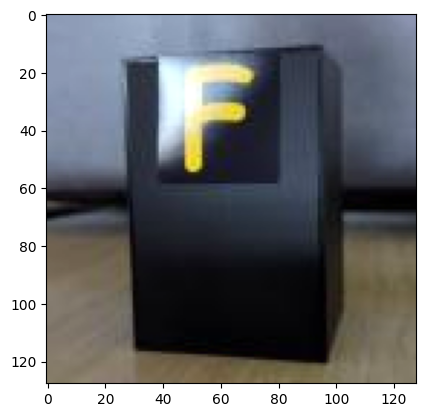

In [283]:
#convert from BGR to RGB
rgb_image = cv2.cvtColor(scale_abs, cv2.COLOR_BGR2RGB)
plt.imshow(rgb_image)

#### Adaptive threshold

In [284]:
# convert img to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# do adaptive threshold on gray image
adap_thresh = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 1)

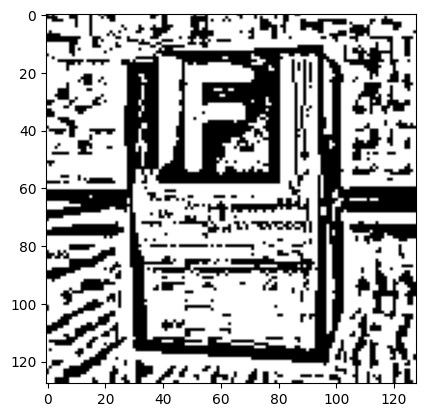

In [285]:
#convert from BGR to RGB
rgb_image = cv2.cvtColor(adap_thresh, cv2.COLOR_BGR2RGB)
plt.imshow(rgb_image)

#### Histogram equalization

In [286]:
B, G, R = cv2.split(image)
B = cv2.equalizeHist(B)
G = cv2.equalizeHist(G)
R = cv2.equalizeHist(R)
hist_eq = cv2.merge((B,G,R))

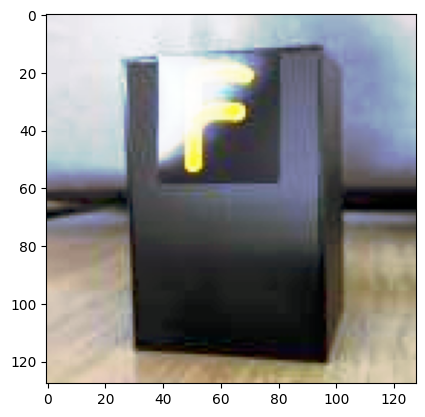

In [287]:
#convert from BGR to RGB
rgb_image = cv2.cvtColor(hist_eq, cv2.COLOR_BGR2RGB)
plt.imshow(rgb_image)

##### CLAHE

In [288]:
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))

B, G, R = cv2.split(image)
B = clahe.apply(B)
G = clahe.apply(G)
R = clahe.apply(R)
clahe_img = cv2.merge((B,G,R))

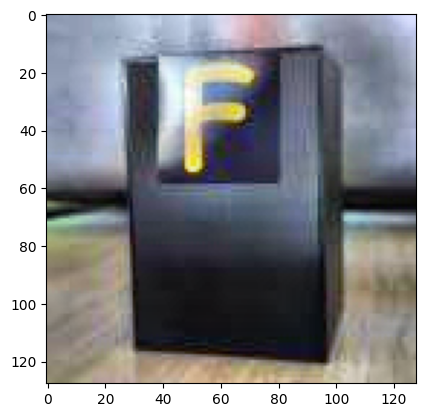

In [289]:
#convert from BGR to RGB
rgb_image = cv2.cvtColor(clahe_img, cv2.COLOR_BGR2RGB)
plt.imshow(rgb_image)